In [346]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [347]:
import nltk
import warnings
import wordcloud
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from deep_translator import GoogleTranslator
from nltk.sentiment.vader import SentimentIntensityAnalyzer

warnings.filterwarnings('ignore')

In [348]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");

In [349]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bioco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bioco\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bioco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [350]:
sid = SentimentIntensityAnalyzer()

In [ ]:
#data = pd.read_csv('E:\Laura\Frutas\Chirimoya.csv')
data = pd.read_csv('E:\Laura\Frutas\Fruits_data.csv')
fruta = 'Pitahaya' # Zapote, Chontaduro, Mamoncillo, Zapote, Chirimoya
data = data.loc[data['Fruta']==fruta].drop(['Fruta','Sus respuestas serán tratadas de manera confidencial y anónima, con fines netamente académicos.'],axis=1)
data

,Marca temporal,¿Con qué género te identificas?,¿Qué tan importante es para ti el color del fruto al momento de comprarlos en el mercado?,¿Qué tan importante es para ti la apariencia del fruto al momento de comprarlos en el mercado?,¿Qué tan importante es para ti el aroma del fruto al momento de comprarlos en el mercado?,¿Qué tan importante es para ti la textura y firmeza del fruto al momento de comprarlos en el mercado?,¿Qué tan importante es para ti el tamaño del fruto al momento de comprarlos en el mercado?,¿Qué tan importante es para ti el estado de madurez del fruto al momento de comprarlos en el mercado?,¿Qué tan importante es para ti el precio en relación a la calidad del fruto al momento de comprarlos en el mercado?,¿Qué tan importante es para ti el origen del fruto al momento de comprarlos en el mercado?,Describe el estado general del fruto (Apariencia externa),Describe el estado general del fruto (Apariencia interna),Describe la intensidad de color y brillo de la cáscara (si aplica el brillo) y lo que te provoca al verlo,Describe el aroma del producto y lo que te produce el producto al momento de olerlo,Descripción de la textura del producto y la sensación que te provoca,Describe el sabor y lo que te provoca el sabor,¿Qué remembranza te provoca la fruta? (remembranza: recuerdos),¿Que sensación te provoca la fruta? (A nivel general),Describe que criterios tienes al momento de adquirir este producto en un lugar de mercado
0,2023/10/05 1:38:58 p. m. GMT-5,Masculino,Moderadamente importante,Importante,Moderadamente importante,Importante,Importante,Muy importante,Importante,Moderadamente importante,"Me gusta, tiene colores brillantes y se ve fresca","Fresca, bien hidratada","Es clara, brillante, de buen aspecto, es inter...","Tiene olor curioso, no me atrae demasiado","Esta blanda, me gusta",Tiene buen sabor,"No muy clara, no suelo comerla",Me gusta,Color y textura
1,2023/10/05 1:45:05 p. m. GMT-5,Masculino,Moderadamente importante,Moderadamente importante,Muy importante,Muy importante,Moderadamente importante,Importante,Moderadamente importante,Moderadamente importante,"Brillante,blandita",Blandita de buen tamaño con poco aroma,"Brillante,y me provoca curiosidad al ser de un...",Poco intenso aroma anidado,Textura suave un poco carrasposa,Es un sabor poco dulce refrescante con un tono...,Recuerdo la pitaya normal,Sasia la sed y deja un sabor rico en la boca,El tamaño el estado de madures y el color
2,2023/10/05 1:48:54 p. m. GMT-5,Masculino,Importante,Importante,Importante,Moderadamente importante,Moderadamente importante,Importante,Muy importante,Moderadamente importante,Se ve bien,Se ve rico,Apetitoso,Huele bien,Me gusta,Fresco,Ninguno,Buena,Precio
3,2023/10/05 1:49:22 p. m. GMT-5,Femenino,Importante,Importante,Moderadamente importante,Importante,Moderadamente importante,Moderadamente importante,Poco importante,Importante,Color rosado blando,Transparente y rosada,Intensidad del color alta y opaca,Frutal,Lisa,Desabrido,Ninguna,No es rica,Color sabor
4,2023/10/05 1:49:40 p. m. GMT-5,Femenino,Importante,Muy importante,Muy importante,Muy importante,Importante,Muy importante,Importante,Importante,Uno es más brillante que el otro y es más gra...,Se ve maduro,Uno está más maduro que el otro,Fruta fresca,Esta para consumir inmediatamente,Esta pasada.,Mi mamá me picaba Pitaya todas las mañanas ant...,Que está pasada al comerla.,Mirar que no esté tan madura para que me dure ...
5,2023/10/05 1:49:42 p. m. GMT-5,Masculino,Muy importante,Muy importante,Importante,Importante,Moderadamente importante,Importante,Moderadamente importante,Muy importante,Color poco homogéneo.,"Súper llamativo. Blando, jugoso.",Media,Básica,"Suave, jugosa","Jugoso, calma la sed",Lo exótico,El desierto,Precio.
6,2023/10/05 1:51:53 p. m. GMT-5,Femenino,Importante,Moderadamente importante,Importante,Importante,Nada importante,Moderadamente importante,Moderadamente importante,Poco importante,"Blando, color rosado, textura lisa , fruto de ...","Firmé con semill

In [352]:
new_col = []
for i in data.columns:
    i = i.replace('.1', '')
    i = i.replace('.2', '')
    i = i.replace('.3', '')
    i = i.replace('.4', '')
    i = i.replace('.5', '')
    i = i.replace('.6', '')
    i = i.replace('.7', '')
    i = i.replace('.8', '')
    i = i.replace('.9', '')
    i = i.replace('.10', '')
    new_col.append(i)
data.columns = new_col

In [353]:
data.iloc[1:(1+1),1:2]['¿Con qué género te identificas?'].reset_index(drop=True)[0]

'Masculino'

In [354]:
# 2:9, 9:16, 16:23, 23:30
df_total = pd.DataFrame()
for i in range(len(data)):
    j = 2
    k = 9
    while k < 31:
        f = data.iloc[i:(i+1),j:k]
        j = j + 7
        k = k + 7
        f['genero'] = data.iloc[i:(i+1),1:2]['¿Con qué género te identificas?'].reset_index(drop=True)[0]
        df_total = pd.concat([df_total, f])

df_total = df_total.fillna('No sabe')

In [355]:
df_1 = df_total
data_cloud = df_1.drop(['genero'], axis = 1)
data_cloud = data_cloud.iloc[:, -9:]

In [356]:
for i in data_cloud.columns:
    for j in range(((len(data_cloud)))):
        data_cloud[i].iloc[j] = GoogleTranslator(source='auto', target='en').translate(data_cloud[i].iloc[j])


In [ ]:
data_cloud = data_cloud.reset_index().drop('index',axis=1)
data_cloud

,Describe el estado general del fruto (Apariencia externa),Describe el estado general del fruto (Apariencia interna),Describe la intensidad de color y brillo de la cáscara (si aplica el brillo) y lo que te provoca al verlo,Describe el aroma del producto y lo que te produce el producto al momento de olerlo,Descripción de la textura del producto y la sensación que te provoca,Describe el sabor y lo que te provoca el sabor,¿Qué remembranza te provoca la fruta? (remembranza: recuerdos),¿Que sensación te provoca la fruta? (A nivel general),Describe que criterios tienes al momento de adquirir este producto en un lugar de mercado
0,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know
1,Describes the general condition of the fruit (...,Describes the general condition of the fruit (...,Describe the intensity of color and shine of t...,Describe the aroma of the product and what the...,Description of the texture of the product and ...,Describe the flavor and what makes you feel th...,Does not know,Does not know,Does not know
2,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,What memories does fruit provoke in you? (reme...,What sensation does fruit make you feel? (A ge...,Describe what criteria you have when purchasin...
3,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know
4,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know
...,...,...,...,...,...,...,...,...,...
163,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know
164,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know
165,Maturity,Certainly mature,Dull coffee and makes me want to drink it,Wood and gives me peace of mind,Hard and gives me a lot of pleasure,Salty and I love it,Does not know,Does not know,Does not know
166,Does not know,Does not know,Does not know,Does not know,Does not know,Does not know,to my childhood,Happiness,"Weight, size and price"


In [ ]:
data_c = []
for i in data_cloud.columns:
    if data_cloud[i].isnull().values.any():
        continue
    text = " ".join(j for j in data_cloud[i])
    data_c.append(text)

text = " ".join(j for j in data_c)
text

"Does not know Describes the general condition of the fruit (External appearance) Does not know Does not know Does not know It has a very marked, attractive color Does not know Does not know Does not know Small a little hard opaque color Does not know Does not know Does not know It looks small Does not know Does not know Does not know orange sign Does not know Does not know Does not know Ripe. It doesn't look so good. Does not know Does not know Does not know Good, slightly deformed, with little color intensity. Does not know Does not know Does not know Small smooth, like not uniform Does not know Does not know Does not know It's not very pretty Does not know Does not know Does not know It's not that flashy Does not know Does not know Does not know Fairly healthy, dull colors and dry corolla Does not know Does not know Does not know copper color, with some cracks, very firm to the touch Does not know Does not know Does not know Bueno Does not know Does not know Does not know In good st

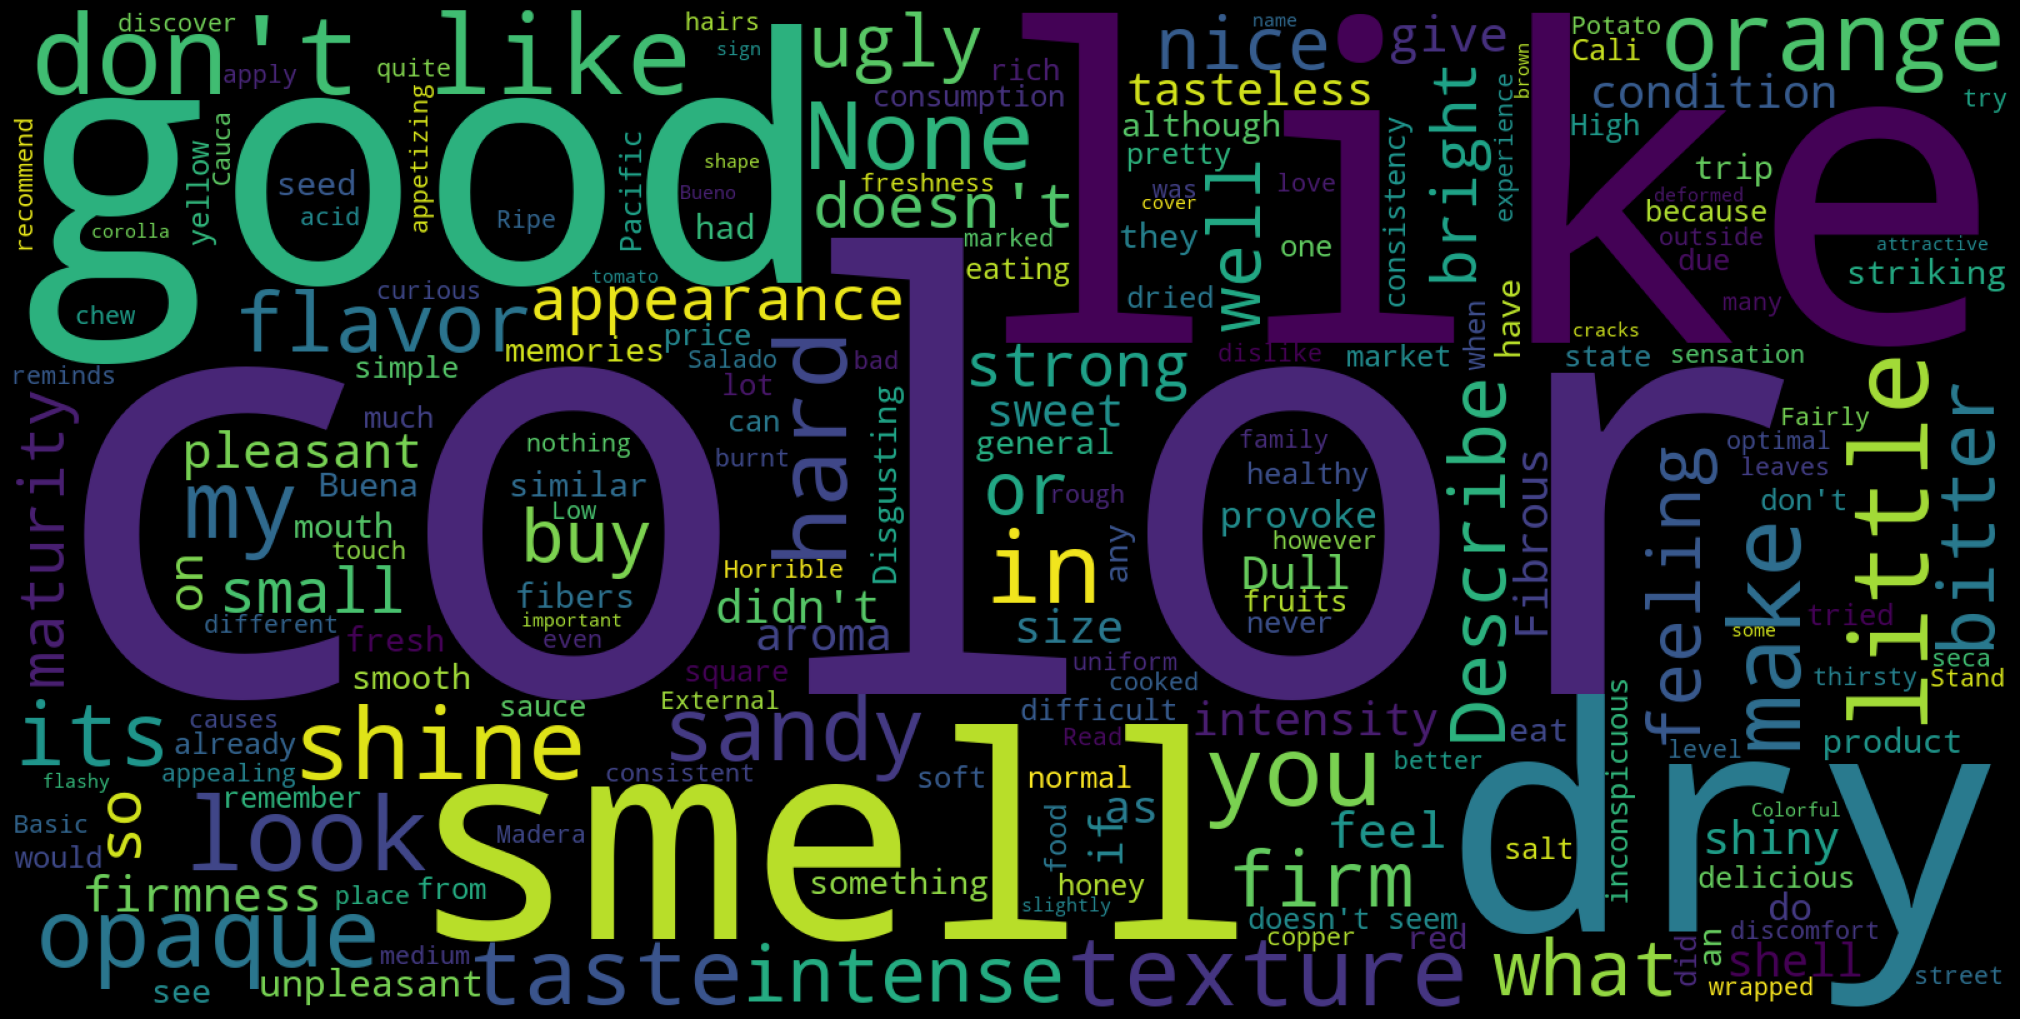

In [ ]:
stopwords_1 = set(stopwords.words('spanish', 'english'))
stopwords_1.update([ "Does","not","know","and","the","but","with","who","that","all","be","fruit","of","it","very","for","will","i","is","to"])
wordcloud = WordCloud(stopwords=stopwords_1, background_color="white").generate(text)

wordcloud = WordCloud( stopwords = stopwords_1,width=1600, height=800).generate(text)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df_senti = pd.DataFrame()
for i in df_total.iloc[:,1:-1].columns:
    for j in range(round(len(df_total)/4)):
        if df_total[i].iloc[j] is not None:
            df_total[i].iloc[j] = GoogleTranslator(source='auto', target='en').translate(df_total[i].iloc[j])
            sentimiento = sid.polarity_scores(df_total[i].iloc[j])
            df_t = pd.DataFrame({'Pregunta':i,
                                 'Genero':df_total['genero'].iloc[j],
                                 'Sentimiento Negativo':sentimiento['neg'],
                                'Sentimiento Neutro':sentimiento['neu'],
                                'Sentimiento Positivo':sentimiento['pos'],
                                'Sentimientos':sentimiento['compound']}, index=[0])
            df_senti = pd.concat([df_senti, df_t])
df_senti = df_senti.reset_index(drop=True)

In [ ]:
df_senti1 = pd.DataFrame()
for i in df_total.iloc[:,1:-1].columns:
    for j in range(round(len(df_total)/4),((round(len(df_total)/4))*2)):
        if df_total[i].iloc[j] is not None:
            df_total[i].iloc[j] = GoogleTranslator(source='auto', target='en').translate(df_total[i].iloc[j])
            sentimiento = sid.polarity_scores(df_total[i].iloc[j])
            df_t1 = pd.DataFrame({'Pregunta':i,
                                 'Genero':df_total['genero'].iloc[j],
                                 'Sentimiento Negativo':sentimiento['neg'],
                                'Sentimiento Neutro':sentimiento['neu'],
                                'Sentimiento Positivo':sentimiento['pos'],
                                'Sentimientos':sentimiento['compound']}, index=[0])
            df_senti1 = pd.concat([df_senti1, df_t1])
df_senti1 = df_senti1.reset_index(drop=True)

In [ ]:
df_senti2 = pd.DataFrame()
for i in df_total.iloc[:,1:-1].columns:
    for j in range(((round(len(df_total)/4))*2),((round(len(df_total)/4))*3)):
        if df_total[i].iloc[j] is not None:
            df_total[i].iloc[j] = GoogleTranslator(source='auto', target='en').translate(df_total[i].iloc[j])
            sentimiento = sid.polarity_scores(df_total[i].iloc[j])
            df_t2 = pd.DataFrame({'Pregunta':i,
                                 'Genero':df_total['genero'].iloc[j],
                                 'Sentimiento Negativo':sentimiento['neg'],
                                'Sentimiento Neutro':sentimiento['neu'],
                                'Sentimiento Positivo':sentimiento['pos'],
                                'Sentimientos':sentimiento['compound']}, index=[0])
            df_senti2 = pd.concat([df_senti2, df_t2])
df_senti2 = df_senti2.reset_index(drop=True)

In [ ]:
df_senti3 = pd.DataFrame()
for i in df_total.iloc[:,1:-1].columns:
    for j in range(((round(len(df_total)/4))*3),len(df_total)):
        if df_total[i].iloc[j] is not None:
            df_total[i].iloc[j] = GoogleTranslator(source='auto', target='en').translate(df_total[i].iloc[j])
            sentimiento = sid.polarity_scores(df_total[i].iloc[j])
            df_t3 = pd.DataFrame({'Pregunta':i,
                                 'Genero':df_total['genero'].iloc[j],
                                 'Sentimiento Negativo':sentimiento['neg'],
                                'Sentimiento Neutro':sentimiento['neu'],
                                'Sentimiento Positivo':sentimiento['pos'],
                                'Sentimientos':sentimiento['compound']}, index=[0])
            df_senti3 = pd.concat([df_senti3, df_t3])
df_senti3 = df_senti3.reset_index(drop=True)

In [ ]:
df_senti = pd.concat([df_senti,df_senti1,df_senti2,df_senti3],axis=0)
df_senti

,Pregunta,Genero,Sentimiento Negativo,Sentimiento Neutro,Sentimiento Positivo,Sentimientos
0,¿Qué tan importante es para ti la apariencia d...,Masculino,0.0,0.893,0.107,0.2023
1,¿Qué tan importante es para ti la apariencia d...,Masculino,0.0,1.000,0.000,0.0000
2,¿Qué tan importante es para ti la apariencia d...,Masculino,0.0,1.000,0.000,0.0000
3,¿Qué tan importante es para ti la apariencia d...,Masculino,0.0,1.000,0.000,0.0000
4,¿Qué tan importante es para ti la apariencia d...,Masculino,0.0,0.357,0.643,0.2023
...,...,...,...,...,...,...
667,¿Que sensación te provoca la fruta? (A nivel g...,Masculine,0.0,1.000,0.000,0.0000
668,¿Que sensación te provoca la fruta? (A nivel g...,Female,0.0,1.000,0.000,0.0000
669,¿Que sensación te provoca la fruta? (A nivel g...,Female,0.0,1.000,0.000,0.0000
670,¿Que sensación te provoca la fruta? (A nivel g...,Female,0.0,0.000,1.000,0.5574


In [ ]:
df_t_s = df_senti.copy()

In [ ]:
ag1 = df_t_s

In [ ]:
ag1['Sent'] = 'Neutral'
ag1['Sent'][ag1['Sentimientos'] > 0.3] = 'Positive'
ag1['Sent'][ag1['Sentimientos'] < -0.3] = 'Negative'
ag1

,Pregunta,Genero,Sentimiento Negativo,Sentimiento Neutro,Sentimiento Positivo,Sentimientos,Sent
0,¿Qué tan importante es para ti la apariencia d...,Masculino,0.0,0.893,0.107,0.2023,Neutral
1,¿Qué tan importante es para ti la apariencia d...,Masculino,0.0,1.000,0.000,0.0000,Neutral
2,¿Qué tan importante es para ti la apariencia d...,Masculino,0.0,1.000,0.000,0.0000,Neutral
3,¿Qué tan importante es para ti la apariencia d...,Masculino,0.0,1.000,0.000,0.0000,Neutral
4,¿Qué tan importante es para ti la apariencia d...,Masculino,0.0,0.357,0.643,0.2023,Neutral
...,...,...,...,...,...,...,...
667,¿Que sensación te provoca la fruta? (A nivel g...,Masculine,0.0,1.000,0.000,0.0000,Neutral
668,¿Que sensación te provoca la fruta? (A nivel g...,Female,0.0,1.000,0.000,0.0000,Neutral
669,¿Que sensación te provoca la fruta? (A nivel g...,Female,0.0,1.000,0.000,0.0000,Neutral
670,¿Que sensación te provoca la fruta? (A nivel g...,Female,0.0,0.000,1.000,0.5574,Positive


<Axes: xlabel='Sent', ylabel='Count'>

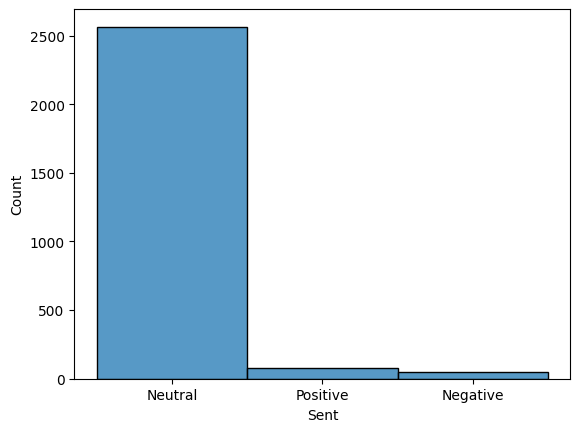

In [ ]:
sns.histplot(ag1['Sent'])